In [50]:
from dataclasses import asdict, fields
from pathlib import Path
import pickle

import fsspec
import matplotlib.pyplot as plt
import mlflow
import pandas as pd
import seaborn as sns

from nas import _REPO_ROOT
from nas.benchmark.nats_bench import ArchitectureResult, Dataset, Metrics

## Set up

In [51]:
sns.set_theme()
sns.set_context("notebook")

In [52]:
TRACKING_URI = str(_REPO_ROOT / "results" / "mlruns")
TRACKING_URI

'/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/nas/results/mlruns'

In [53]:
EXPERIMENT_NAME = "sa_imagenet"
EXPERIMENT_NAME

'sa_imagenet'

In [54]:
DATASET = Dataset.IMAGENET

## Load

In [55]:
client = mlflow.tracking.MlflowClient(tracking_uri=TRACKING_URI)
client

In [56]:
selected_experiment = client.search_experiments(
    filter_string=f"name = '{EXPERIMENT_NAME}'"
)[0]
selected_experiment

<Experiment: artifact_location='file:///home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/nas/results/mlruns/514782771682467122', creation_time=1723382722245, experiment_id='514782771682467122', last_update_time=1723382722245, lifecycle_stage='active', name='sa_imagenet', tags={}>

In [57]:
selected_runs = client.search_runs(selected_experiment.experiment_id)
len(selected_runs)

40

In [58]:
run_id_series = pd.Series(run.info.run_id for run in selected_runs)
run_id_series

0     8999be772e60460f9bfe9495b6300746
1     ccdf6b02aafa4be79989bbdb606fa410
2     124a627a02424e709e2a7944085e3bb1
3     40b4d73b3343453094b334f56e03ed5f
4     8285204b75a2455ebe4a6c3c248b1bae
5     535f3a1d19aa42ce8f601a00c365ff59
6     d24fd8acca3d4990a4f4eed66c7418b2
7     ad0ddb3a3d74442f9393983bfaa35b1d
8     9d955f12edb14d42a9ad714c504468ad
9     5299284715df4935b0e8699c37b30f92
10    2adf6460eaa546839ec9157911aa114d
11    a413d5ec1b0043d2817b04715dd5cca5
12    8d732607827648399993fd843ddb5011
13    4dc5d78471954d51bb6f8b4316071a5d
14    5275ae61740c4bc592bce71abc09b731
15    d89cedb9fd924faca91465b7693a5266
16    01c8fb1a7bac44de919d7fc1ee5d4e55
17    dfa1db566fb1426d9604cbf18daa8478
18    cb4b6a3374e1465d8d0488a9d91d107f
19    e310e24d513c4f52b70fadc4fe95438a
20    2b8412ceb101440cad2765a4b2e828b1
21    8d078694c13e46d2a1915350185fa036
22    adb073470b7843adb74fb3220d68247c
23    998292a75a4b47d5b217ca3c34fdc0e6
24    c1909b6adeee4042b6ebe0a623e38131
25    aadb21dbea634fcf83f

### Run metrics

In [59]:
run_df = pd.json_normalize([dict(run.data) for run in selected_runs])
run_df = run_df.set_index(run_id_series)
run_df

,metrics.final_val_time_per_epoch,metrics.final_test_loss,metrics.accuracy,metrics.final_test_accuracy,metrics.time,metrics.control_parameter,metrics.final_val_loss,metrics.loss,metrics.final_val_time,metrics.final_test_time,...,params.benchmark__path,params.optimiser__number_iterations,params.seed,params.optimiser__cooling_schedule__type,params.results_dir,tags.mlflow.source.git.commit,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.runName
8999be772e60460f9bfe9495b6300746,0.546143,2.446524,38.666667,38.266667,6.553713,1.056589e-29,2.424521,2.424521,6.553713,6.553713,...,models/NATS-tss-v1_0-3ffb9-simple,300,9,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,62bbaeaa6efdb32610470e28756ada009995d2b4,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,youthful-mare-496
ccdf6b02aafa4be79989bbdb606fa410,0.290747,2.821589,31.166667,28.700000,3.488963,1.056589e-29,2.817826,2.817826,3.488963,3.488963,...,models/NATS-tss-v1_0-3ffb9-simple,300,8,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,62bbaeaa6efdb32610470e28756ada009995d2b4,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,monumental-whale-612
124a627a02424e709e2a7944085e3bb1,0.478603,2.495987,37.700000,35.733333,5.743236,1.056589e-29,2.467331,2.467331,5.743236,5.743236,...,models/NATS-tss-v1_0-3ffb9-simple,300,7,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,62bbaeaa6efdb32610470e28756ada009995d2b4,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,illustrious-sloth-92
40b4d73b3343453094b334f56e03ed5f,0.546143,2.446524,38.666667,38.266667,6.553713,1.056589e-29,2.424521,2.424521,6.553713,6.553713,...,models/NATS-tss-v1_0-3ffb9-simple,300,6,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,62bbaeaa6efdb32610470e28756ada009995d2b4,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,adaptable-bear-83
8285204b75a2455ebe4a6c3c248b1bae,0.546143,2.446524,38.666667,38.266667,6.553713,1.056589e-29,2.424521,2.424521,6.553713,6.553713,...,models/NATS-tss-v1_0-3ffb9-simple,300,5,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,62bbaeaa6efdb32610470e28756ada009995d2b4,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,puzzled-stork-13
535f3a1d19aa42ce8f601a00c365ff59,0.546143,2.446524,38.666667,38.266667,6.553713,1.056589e-29,2.424521,2.424521,6.553713,6.553713,...,models/NATS-tss-v1_0-3ffb9-simple,300,4,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,62bbaeaa6efdb32610470e28756ada009995d2b4,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,gifted-roo-846
d24fd8acca3d4990a4f4eed66c7418b2,0.546143,2.446524,38.666667,38.266667,6.553713,1.056589e-29,2.424521,2.424521,6.553713,6.553713,...,models/NATS-tss-v1_0-3ffb9-simple,300,3,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,62bbaeaa6efdb32610470e28756ada009995d2b4,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,bedecked-shrew-406
ad0ddb3a3d74442f9393983bfaa35b1d,0.546143,2.446524,38.666667,38.266667,6.553713,1.056589e-29,2.424521,2.424521,6.553713,6.553713,...,models/NATS-tss-v1_0-3ffb9-simple,300,2,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,62bbaeaa6efdb32610470e28756ada009995d2b4,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,efficient-sloth-83
9d955f12edb14d42a9ad714c504468ad,0.477377,2.498099,37.500000,37.133333,5.728527,1.056589e-29,2.476093,2.476093,5.728527,5.728527,...,models/NATS-tss-v1_0-3ffb9-simple,300,1,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,62bbaeaa6efdb32610470e28756ada009995d2b4,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,selective-smelt-970
5299284715df4935b0e8699c37b30f92,0.478603,2.495987,37.700000,35.733333,5.743236,1.056589e-29,2.467331,2.467331,5.743236,5.743236,...,models/NATS-tss-v1_0-3ffb9-simple,300,0,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,62bbaeaa6efdb32610470e28756ada009995d2b4,tomaz,/home/tomaz/git/Politecnico/Extra

In [60]:
run_df.columns

Index(['metrics.final_val_time_per_epoch', 'metrics.final_test_loss',
       'metrics.accuracy', 'metrics.final_test_accuracy', 'metrics.time',
       'metrics.control_parameter', 'metrics.final_val_loss', 'metrics.loss',
       'metrics.final_val_time', 'metrics.final_test_time',
       'metrics.final_val_accuracy', 'metrics.transition',
       'metrics.time_per_epoch', 'metrics.final_test_time_per_epoch',
       'params.optimiser__cooling_schedule__decay_rate',
       'params.optimiser__cooling_schedule__length', 'params.results_base_dir',
       'params.benchmark__name', 'params.benchmark__dataset',
       'params.optimiser__algorithm',
       'params.optimiser__cooling_schedule__initial', 'params.experiment_name',
       'params.benchmark__path', 'params.optimiser__number_iterations',
       'params.seed', 'params.optimiser__cooling_schedule__type',
       'params.results_dir', 'tags.mlflow.source.git.commit',
       'tags.mlflow.user', 'tags.mlflow.source.name',
       'tags.mlflo

### Run metric histories

In [61]:
fields(Metrics)

(Field(name='loss',type=float | None,default=<dataclasses._MISSING_TYPE object at 0x7b8a99631640>,default_factory=<dataclasses._MISSING_TYPE object at 0x7b8a99631640>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD),
 Field(name='accuracy',type=float | None,default=<dataclasses._MISSING_TYPE object at 0x7b8a99631640>,default_factory=<dataclasses._MISSING_TYPE object at 0x7b8a99631640>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD),
 Field(name='time_per_epoch',type=float | None,default=<dataclasses._MISSING_TYPE object at 0x7b8a99631640>,default_factory=<dataclasses._MISSING_TYPE object at 0x7b8a99631640>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD),
 Field(name='time',type=float | None,default=<dataclasses._MISSING_TYPE object at 0x7b8a99631640>,default_factory=<dataclasses._MISSING_TYPE object at 0x7b8a99631640>,init=T

In [62]:
history_df_list = []
for run in selected_runs:
    run_history_df = pd.DataFrame({"step": []})
    for field in fields(Metrics):
        run_id = run.info.run_id
        history = client.get_metric_history(run_id, field.name)
        field_df = pd.DataFrame(dict(step) for step in history)
        field_df = field_df[["step", "value"]].rename(columns={"value": field.name})
        run_history_df = run_history_df.join(
            field_df,
            how="right",
            on="step",
            rsuffix="_r",
        ).drop(columns="step_r")
    run_history_df["run_id"] = run_id
    history_df_list.append(run_history_df)
history_df = pd.concat(history_df_list)
history_df

,step,loss,accuracy,time_per_epoch,time,run_id
0,0,2.634105,34.100000,0.455150,5.461797,8999be772e60460f9bfe9495b6300746
1,1,2.634105,34.100000,0.455150,5.461797,8999be772e60460f9bfe9495b6300746
2,2,2.634105,34.100000,0.455150,5.461797,8999be772e60460f9bfe9495b6300746
3,3,2.682703,33.333333,0.372152,4.465821,8999be772e60460f9bfe9495b6300746
4,4,2.682703,33.333333,0.372152,4.465821,8999be772e60460f9bfe9495b6300746
...,...,...,...,...,...,...
295,295,2.464624,38.000000,0.496614,5.959363,1f875b05f5c14c8394dd9ecdbbd78c08
296,296,2.464624,38.000000,0.496614,5.959363,1f875b05f5c14c8394dd9ecdbbd78c08
297,297,2.464624,38.000000,0.496614,5.959363,1f875b05f5c14c8394dd9ecdbbd78c08
298,298,2.464624,38.000000,0.496614,5.959363,1f875b05f5c14c8394dd9ecdbbd78c08


In [63]:
history_df["run_id"].isin(run_id_series).all()

True

### Run artifacts

Final `ArchitectureResult` objects are serialised and stored as artifacts

In [64]:
selected_runs[0].info.artifact_uri

'file:///home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/nas/results/mlruns/514782771682467122/8999be772e60460f9bfe9495b6300746/artifacts'

In [65]:
mlflow.artifacts.list_artifacts(
    selected_runs[0].info.artifact_uri, tracking_uri=TRACKING_URI
)

[<FileInfo: file_size=648, is_dir=False, path='artifacts/result.pkl'>]

In [66]:
run_results: list[ArchitectureResult] = []
for run in selected_runs:
    artifact_uri: str = run.info.artifact_uri
    with fsspec.open(Path(artifact_uri) / "result.pkl", "rb") as f:
        run_results.append(pickle.load(f))
run_results

[ArchitectureResult(index=2581, train=Metrics(loss=2.334023912690074, accuracy=40.043506921052774, time_per_epoch=87.30834353645643, time=1047.7001224374771), val=Metrics(loss=2.4245214417775474, accuracy=38.66666662597656, time_per_epoch=0.5461427620479039, time=6.553713144574846), test=Metrics(loss=2.4465244286855063, accuracy=38.266666595458986, time_per_epoch=0.5461427620479039, time=6.553713144574846), flops=38.32588, size_parameters=1.080616, latency=0.022077337900797526),
 ArchitectureResult(index=3511, train=Metrics(loss=2.817153781338907, accuracy=30.02504943897949, time_per_epoch=33.333053854624424, time=399.9966462554931), val=Metrics(loss=2.817825574874878, accuracy=31.166666681925456, time_per_epoch=0.2907469272613525, time=3.4889631271362296), test=Metrics(loss=2.821589117050171, accuracy=28.69999993387858, time_per_epoch=0.2907469272613525, time=3.4889631271362296), flops=10.80076, size_parameters=0.323496, latency=0.009887758890787761),
 ArchitectureResult(index=2053, t

In [67]:
result_df = pd.json_normalize(asdict(result) for result in run_results)
result_df = result_df.set_index(run_id_series)
result_df

,index,flops,size_parameters,latency,train.loss,train.accuracy,train.time_per_epoch,train.time,val.loss,val.accuracy,...,test.loss,test.accuracy,test.time_per_epoch,test.time,architecture.edge_0_to_1,architecture.edge_0_to_2,architecture.edge_1_to_2,architecture.edge_0_to_3,architecture.edge_1_to_3,architecture.edge_2_to_3
8999be772e60460f9bfe9495b6300746,2581,38.32588,1.080616,0.022077,2.334024,40.043507,87.308344,1047.700122,2.424521,38.666667,...,2.446524,38.266667,0.546143,6.553713,3,2,3,1,3,3
ccdf6b02aafa4be79989bbdb606fa410,3511,10.80076,0.323496,0.009888,2.817154,30.025049,33.333054,399.996646,2.817826,31.166667,...,2.821589,28.700000,0.290747,3.488963,0,1,0,3,0,1
124a627a02424e709e2a7944085e3bb1,2053,29.47852,0.837576,0.019318,2.384468,38.898484,72.891679,874.700145,2.467331,37.700000,...,2.495987,35.733333,0.478603,5.743236,3,3,0,1,2,3
40b4d73b3343453094b334f56e03ed5f,2581,38.32588,1.080616,0.022077,2.334024,40.043507,87.308344,1047.700122,2.424521,38.666667,...,2.446524,38.266667,0.546143,6.553713,3,2,3,1,3,3
8285204b75a2455ebe4a6c3c248b1bae,2581,38.32588,1.080616,0.022077,2.334024,40.043507,87.308344,1047.700122,2.424521,38.666667,...,2.446524,38.266667,0.546143,6.553713,3,2,3,1,3,3
535f3a1d19aa42ce8f601a00c365ff59,2581,38.32588,1.080616,0.022077,2.334024,40.043507,87.308344,1047.700122,2.424521,38.666667,...,2.446524,38.266667,0.546143,6.553713,3,2,3,1,3,3
d24fd8acca3d4990a4f4eed66c7418b2,2581,38.32588,1.080616,0.022077,2.334024,40.043507,87.308344,1047.700122,2.424521,38.666667,...,2.446524,38.266667,0.546143,6.553713,3,2,3,1,3,3
ad0ddb3a3d74442f9393983bfaa35b1d,2581,38.32588,1.080616,0.022077,2.334024,40.043507,87.308344,1047.700122,2.424521,38.666667,...,2.446524,38.266667,0.546143,6.553713,3,2,3,1,3,3
9d955f12edb14d42a9ad714c504468ad,4747,29.47852,0.837576,0.016256,2.408803,38.273566,73.012764,876.153172,2.476093,37.500000,...,2.498099,37.133333,0.477377,5.728527,2,3,0,1,3,3
5299284715df4935b0e8699c37b30f92,2053,29.47852,0.837576,0.019318,2.384468,38.898484,72.891679,874.700145,2.467331,37.700000,...,2.495987,35.733333,0.478603,5.743236,3,3,0,1,2,3


In [68]:
result_df.columns

Index(['index', 'flops', 'size_parameters', 'latency', 'train.loss',
       'train.accuracy', 'train.time_per_epoch', 'train.time', 'val.loss',
       'val.accuracy', 'val.time_per_epoch', 'val.time', 'test.loss',
       'test.accuracy', 'test.time_per_epoch', 'test.time',
       'architecture.edge_0_to_1', 'architecture.edge_0_to_2',
       'architecture.edge_1_to_2', 'architecture.edge_0_to_3',
       'architecture.edge_1_to_3', 'architecture.edge_2_to_3'],
      dtype='object')

## Analyse

<Axes: xlabel='index', ylabel='Count'>

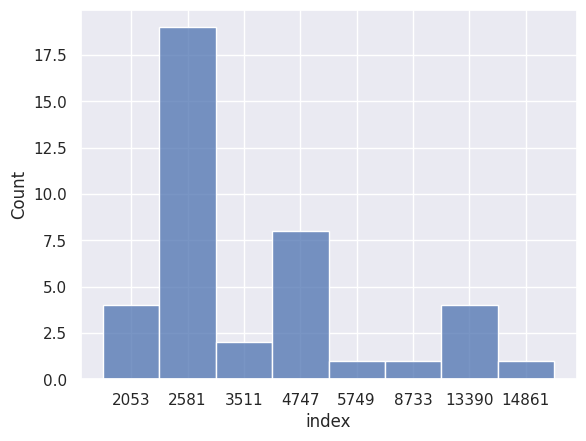

In [20]:
sns.histplot(result_df["index"].sort_values().astype("str"))

<Axes: xlabel='params.optimiser__number_iterations', ylabel='val.accuracy'>

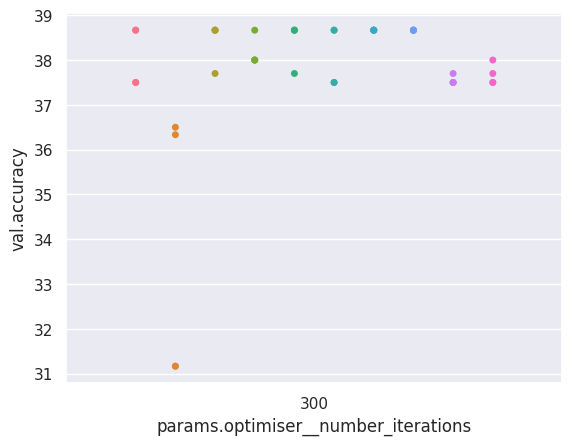

In [21]:
ax = plt.subplot()
sns.stripplot(
    result_df.join(run_df),
    x="params.optimiser__number_iterations",
    y="val.accuracy",
    hue="params.seed",
    palette="husl",
    dodge=True,
    jitter=False,
    legend=False,
    ax=ax,
)

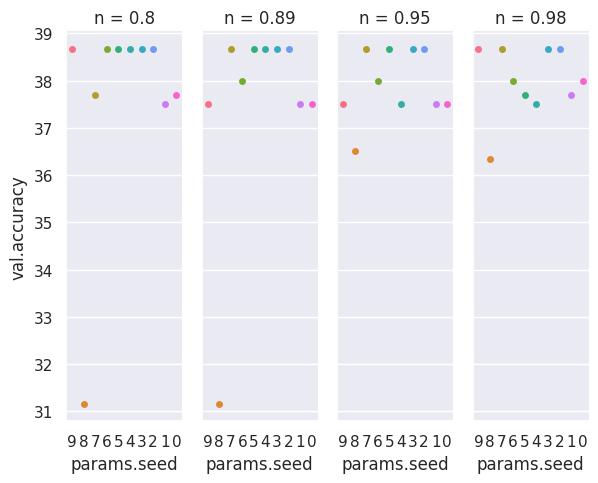

In [22]:
sns.catplot(
    result_df.join(run_df).rename(
        columns={"params.optimiser__cooling_schedule__decay_rate": "n"}
    ),
    x="params.seed",
    y="val.accuracy",
    col="n",
    col_wrap=5,
    hue="params.seed",
    palette="husl",
    aspect=0.3,
    legend=False,
)

In [23]:
OPTIMAL_INDICES = {
    Dataset.CIFAR10: 13714,
    Dataset.IMAGENET: 2581,
}

In [24]:
result_df["optimal"] = result_df["index"] == OPTIMAL_INDICES[DATASET]
result_df["optimal"].mean()

0.475

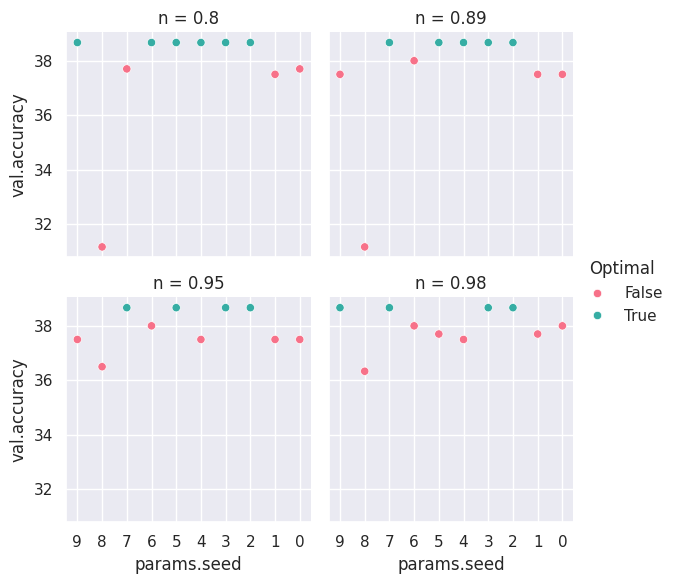

In [25]:
g = sns.FacetGrid(
    result_df.join(run_df).rename(
        columns={"params.optimiser__cooling_schedule__decay_rate": "n"}
    ),
    col="n",
    col_wrap=2,
    height=3,
)
g.map_dataframe(
    sns.scatterplot,
    x="params.seed",
    y="val.accuracy",
    hue="optimal",
    palette="husl",
)
g.add_legend(title="Optimal")

Fabrizio's plot

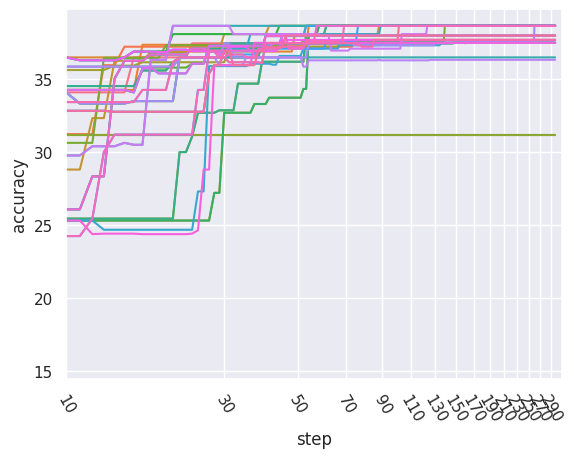

In [69]:
from matplotlib.ticker import ScalarFormatter

ax = plt.subplot()
ax = sns.lineplot(
    history_df,
    x="step",
    y="accuracy",
    hue="run_id",
    palette="husl",
    legend=False,
)
ax.set(
    xlim=10,
    xscale="log",
    xticks=[i for i in range(10, history_df["step"].max(), 20)],
)
ax.get_xaxis().set_major_formatter(ScalarFormatter())
ax.tick_params(axis="x", labelrotation=-60)